In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# set random seeds
np.random.seed(2)
tf.random.set_seed(2)

In [2]:
# load CND data
CND = pd.read_csv('../Data/Compressed_NFL_Data_Pre2020.csv')

In [3]:
# use OrdinalEncoder to transform team and opp to numeric value
ord_enc = OrdinalEncoder()
CND['team_code'] = ord_enc.fit_transform(CND[['team']])
CND.team_code = CND.team_code.astype(int)
CND['opp_code'] = ord_enc.fit_transform(CND[['opp']])
CND.opp_code = CND.opp_code.astype(int)
Codes = CND[['team', 'team_code', 'opp', 'opp_code']]

In [4]:
ABC = CND[['spread', 'opp_def_score_avg', 'tm_off_score_avg', 'tm_def_score_avg', 'opp_off_totyd_avg', 'opp_winning%',
           'opp_off_score_avg', 'tm_off_to_avg', 'opp_off_to_avg', 'tm_def_rushy_avg', 'tm_off_totyd_avg',
           'opp_def_rushy_avg', 'opp_off_rushy_avg', 'tm_winning%', 'opp_def_totyd_avg', 'tm_def_totyd_avg',
           'tm_rush_att_avg', 'opp_pass_att_avg', 'tm_sacked_avg', 'tm_pass_att_avg', 'opp_pass_td_avg',
           'opp_sacked_avg', 'tm_pass_td_avg', 'tm_def_to_avg', 'opp_def_to_avg', 'opp_rush_td_avg', 'result']]

In [5]:
corr = ABC.corr()
corr

,spread,opp_def_score_avg,tm_off_score_avg,tm_def_score_avg,opp_off_totyd_avg,opp_winning%,opp_off_score_avg,tm_off_to_avg,opp_off_to_avg,tm_def_rushy_avg,...,opp_pass_att_avg,tm_sacked_avg,tm_pass_att_avg,opp_pass_td_avg,opp_sacked_avg,tm_pass_td_avg,tm_def_to_avg,opp_def_to_avg,opp_rush_td_avg,result
spread,1.000000,-0.274216,-0.408655,0.274216,0.343735,0.397571,0.408655,0.199567,-0.199567,0.231396,...,0.015020,0.207573,-0.015020,0.299853,-0.207573,-0.299853,-0.146651,0.146651,0.202351,-0.392888
opp_def_score_avg,-0.274216,1.000000,0.012181,0.008345,0.082588,-0.592075,-0.085766,0.029495,0.346512,-0.025439,...,0.334634,0.025115,0.003293,0.068734,0.159385,0.009995,-0.002414,-0.339550,-0.094733,0.113225
tm_off_score_avg,-0.408655,0.012181,1.000000,-0.085766,0.049597,0.012603,0.029237,-0.329216,-0.006460,-0.227006,...,0.026920,-0.381985,0.065764,0.013534,0.006554,0.731757,0.338314,0.001436,0.031649,0.147088
tm_def_score_avg,0.274216,0.008345,-0.085766,1.000000,0.023017,0.002072,0.012181,0.346512,0.029495,0.420226,...,0.003293,0.159385,0.334634,0.009995,0.025115,0.068734,-0.339550,-0.002414,0.008953,-0.113225
opp_off_totyd_avg,0.343735,0.082588,0.049597,0.023017,1.000000,0.363867,0.718731,0.007870,-0.104777,0.007009,...,0.387565,0.018235,0.031484,0.611965,-0.336585,0.021285,0.020829,-0.016150,0.366279,-0.109652
opp_winning%,0.397571,-0.592075,0.012603,0.002072,0.363867,1.000000,0.619036,-0.019636,-0.413186,0.019548,...,-0.200153,-0.016106,0.054509,0.390428,-0.334637,0.012379,-0.026338,0.397398,0.301769,-0.152293
opp_off_score_avg,0.408655,-0.085766,0.029237,0.012181,0.718731,0.619036,1.000000,-0.006460,-0.329216,0.017404,...,0.065764,0.006554,0.026920,0.731757,-0.381985,0.013534,0.001436,0.338314,0.491880,-0.147088
tm_off_to_avg,0.199567,0.029495,-0.329216,0.346512,0.007870,-0.019636,-0.006460,1.000000,0.063733,0.145223,...,0.009199,0.158710,0.219200,0.003410,0.029583,-0.189030,-0.085809,0.038088,-0.024188,-0.112468
opp_off_to_avg,-0.199567,0.346512,-0.006460,0.029495,-0.104777,-0.413186,-0.329216,0.063733,1.000000,0.021294,...,0.219200,0.029583,0.009199,-0.189030,0.158710,0.003410,0.038088,-0.085809,-0.169819,0.112468
tm_def_rushy_avg,0.231396,-0.025439,-0.227006,0.420226,0.007009,0.019548,0.017404,0.145223,0.021294,1.000000,...,-0.005095,0.108072,0.156769,0.032054,0.003905,-0.097350,-0.135240,0.048537,-0.010129,-0.085781


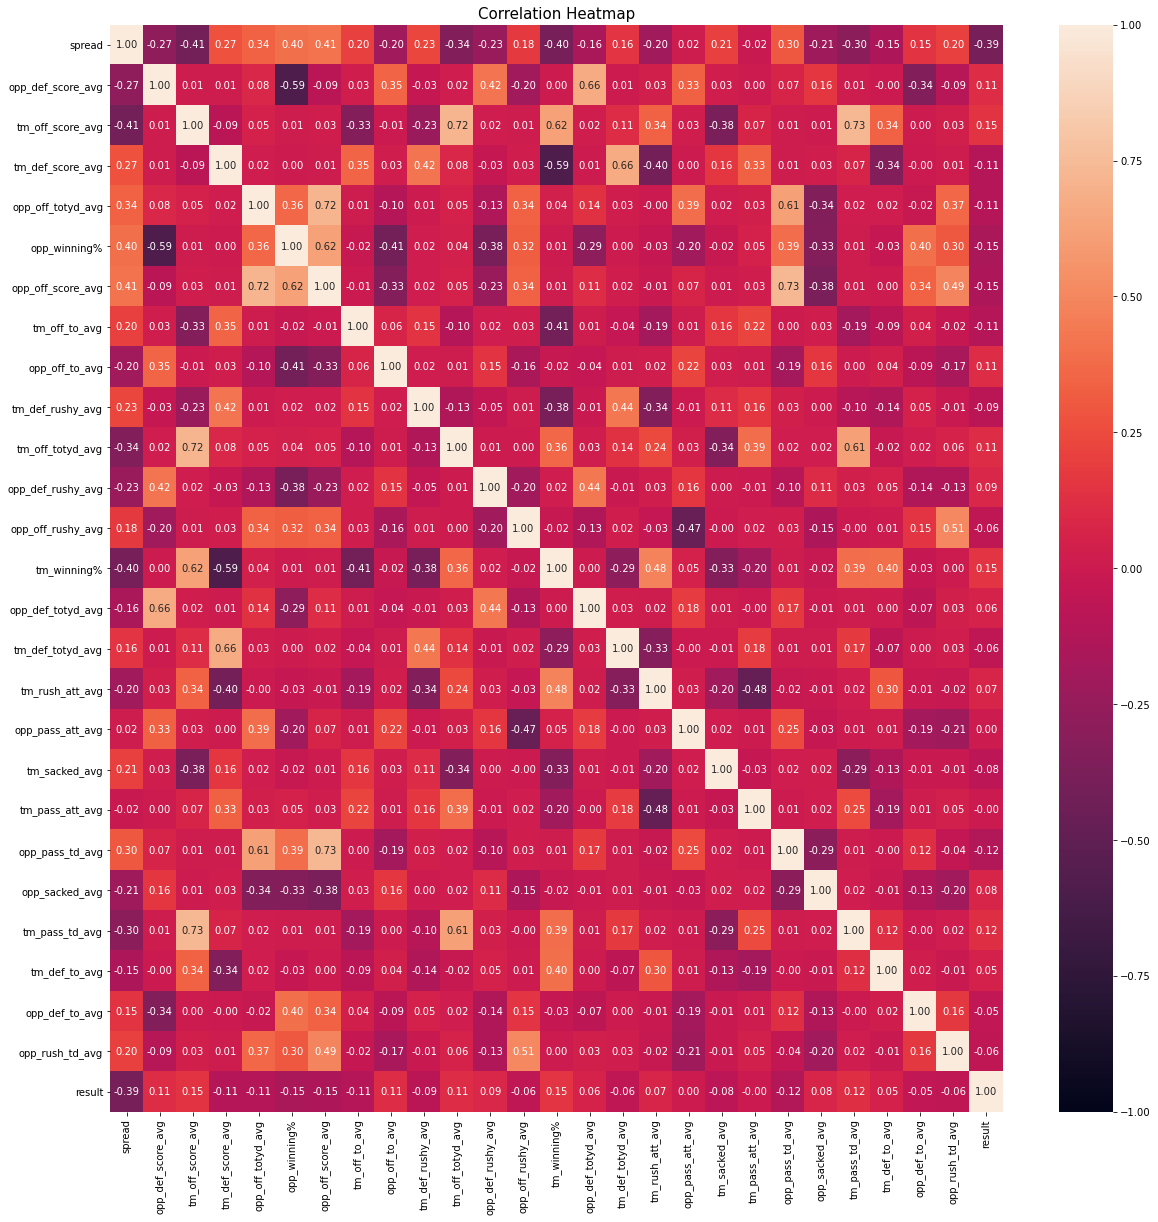

In [6]:
# correlation heat map of new features
plt.figure(figsize = (20,20))
sns.heatmap(corr, vmin = -1, vmax =1, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontdict = {'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [7]:
X = ABC.iloc[:,:-1].values
y = ABC.iloc[:,-1].values

In [8]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# number of samples in each set
print('Samples in training set:', X_train.shape[0])
print('Samples in testing set:', X_test.shape[0])

Samples in training set: 3832
Samples in testing set: 958


In [10]:
# define the keras model
ann_win = Sequential()
ann_win.add(Dense(32, input_dim = 26, activation = 'relu'))
ann_win.add(Dropout(0.3))
ann_win.add(Dense(16, activation = 'relu'))
ann_win.add(Dropout(0.2))
ann_win.add(Dense(8, activation = 'relu'))
ann_win.add(Dense(1, activation = 'sigmoid'))

In [11]:
# compile the keras model
ann_win.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
# fit the keras model on the training set
history = ann_win.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 500, verbose = 0)

In [13]:
# evaluate the keras model
_,accuracy = ann_win.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy * 100))
_,accuracy = ann_win.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

120/120 [==============================] - 0s 554us/step - loss: 0.6101 - accuracy: 0.6686
Accuracy: 66.86
30/30 [==============================] - 0s 571us/step - loss: 0.6258 - accuracy: 0.6545
Accuracy: 65.45


In [14]:
ann_win.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                864       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
______________________________________________________

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


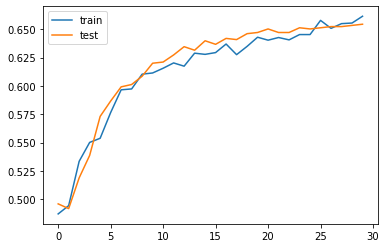

In [16]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

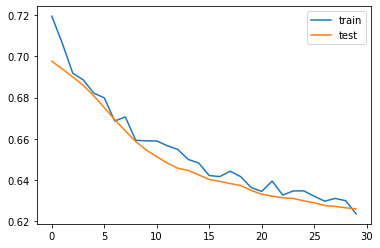

In [17]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
# make probability predictions with the model
y_pred = ann_win.predict(X_test)
y_pred.shape

(958, 1)

In [19]:
xr = y_pred.reshape(958, )

In [20]:
y_test.shape

(958,)

In [21]:
dfRF = pd.DataFrame({'Actual': y_test, 'Predicted': xr})
dfRF

,Actual,Predicted
0,1,0.513192
1,1,0.686625
2,1,0.624773
3,1,0.570853
4,0,0.466962
...,...,...
953,1,0.572136
954,1,0.572383
955,1,0.647639
956,1,0.675316


In [22]:
# save model, weights, architecture
ann_win.save("..\\Pickles\\ann_win.h5")